In [1]:
#Importieren der notwendigen Pakete
#NumPy für Arrays
import numpy as np
#Matplotlib für graphische Darstellungen
import matplotlib.pyplot as plt
#Zugriff auf das Betriebssystem für aufrufen der Ordner
import os
#Automatisierung von Kopierprozessen
import shutil
#Bildverarbeitung
import cv2

In [2]:
#Erstellen der Ordner für Training/Validierung von Hunden/Katzen
os.makedirs("./files/training/dog", exist_ok=True)
os.makedirs("./files/training/cat", exist_ok=True)
os.makedirs("./files/validate/dog", exist_ok=True)
os.makedirs("./files/validate/cat", exist_ok=True)

#Pfad für alle Bilder festlegen
alle_bilder = os.listdir("./files/train")

#Hundebilder von Katzenbildern unterscheiden
hunde = list(filter(lambda image: 'dog' in image, alle_bilder))
katze = list(filter(lambda image: 'cat' in image, alle_bilder))

#Anzahl der Hunde- und Katzenbilder insgesamt
len(hunde) #12.500
len(katze) #12.500

#Festlegen des Validation Index von 20%
validation_index = len(hunde) - len(hunde) * 0.2


#Laden der Bilder in die Variablen nach definiertem Index
training_hunde = hunde[:int(validation_index)]
training_katze = katze[:int(validation_index)]
validation_hunde = hunde[int(validation_index):]
validation_katze = katze[int(validation_index):]

#Funktion zum kopieren der jeweiligen Anzahl der Bilder in die entsprechendem Ordner
def ordner_zuweisen(bilder, ordner):
    for bild in bilder:
        shutil.copyfile(f'./files/train/{bild}', f'{ordner}/{bild}')


12500

12500

In [3]:
#Ausführen der Funktion in die jeweiligen Ordner
ordner_zuweisen(training_hunde, './files/training/dog')
ordner_zuweisen(training_katze, './files/training/cat')
ordner_zuweisen(validation_hunde, './files/validate/dog')
ordner_zuweisen(validation_katze, './files/validate/cat')

In [4]:
#Zugriff auf die Ordner
cat = os.listdir("./files/training/cat")
cat_val = os.listdir("./files/validate/cat")
dog = os.listdir("./files/training/dog")
dog_val = os.listdir("files/validate/dog");

# Ausgabe Anzahl Traininsbilder
len(cat)
len(cat_val)
len(dog)
len(dog_val)

10000

2500

10000

2500

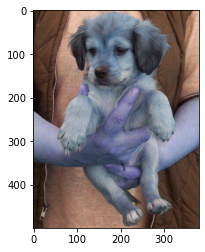

In [5]:
#Festlegen der Verzeichnisse für die Trainings- und Validierungsdaten
DIR_Training= "./files/training"
DIR_Validate = "./files/validate"

#Festlegen der Klassen
Tiere = ["dog", "cat"]

#Anzeigen eines Testbildes zur Überprüfung
for tiere in Tiere:
    path = os.path.join(DIR_Training, tiere) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
        


In [6]:
#Festlegen der Bildgröße zum resizen
bildgröße = 100

In [7]:
#Festlegen von Arrays
training_data = []
validate_data = []

#Funktion definieren zum Kopieren der Bilder in die Arrays und resize
def create_training_data():
    for tiere in Tiere:
        path = os.path.join(DIR_Training, tiere) 
        class_num = Tiere.index(tiere)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (bildgröße,bildgröße))
            training_data.append([new_array, class_num])

def create_validation_data():
    for tiere in Tiere:
        path = os.path.join(DIR_Validate, tiere) 
        class_num = Tiere.index(tiere)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (bildgröße,bildgröße))
            validate_data.append([new_array, class_num])

#Ausführen der Funktionen
create_training_data()
create_validation_data()

In [8]:
#Anzahl der insgesamten Trainings- und Validationsbilder ausgeben
print(len(training_data))
print(len(validate_data))

20000
5000


In [9]:
#Import random
import random

#Shuffeln der Bilder um nicht 10.000 Trainings bzw. 2500 Hunde- oder Katzenbilder am Stück zu haben
random.shuffle(training_data)
random.shuffle(validate_data)

In [10]:
#Erstellen leerer Arrays für die Training und Validation
# X Bildwerte
# Y Hund oder Katze (0,1)
X_train = []
y_train = []

X_val = []
y_val = []

#Befüllen der Listen
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in validate_data:
    X_val.append(features)
    y_val.append(label)

#Reshape, da Tensorflow das Format benötigt
# -1 wird benötigt
# Bildgröße Höhe und Breite
# 3 Farbebenen rot,gelb,grün
X_train = np.array(X_train).reshape(-1, bildgröße, bildgröße, 3)
X_val = np.array(X_val).reshape(-1, bildgröße, bildgröße, 3)
y_train = np.array(y_train)
y_val = np.array(y_val)


In [11]:
#Import der Tensorflow Pakete
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

In [12]:
#Alle Pixelwerte werden durch 255 geteilt
X_train = X_train/255.0
X_val = X_val/255.0

# Model erstellen
model = keras.Sequential([
    keras.layers.Conv2D(
        32,(3,3),activation='relu',input_shape= X_train.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
       64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        256,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        512,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [13]:
#Model kompilieren
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Zusammenfassung des Models ausgeben
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       7

In [14]:
#Trainieren 
cnn_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=48)

Epoch 1/20
417/417 [==============================] - 149s 355ms/step - loss: 0.6572 - accuracy: 0.5939 - val_loss: 0.5840 - val_accuracy: 0.6952
Epoch 2/20
417/417 [==============================] - 148s 355ms/step - loss: 0.5537 - accuracy: 0.7200 - val_loss: 0.5039 - val_accuracy: 0.7518
Epoch 3/20
417/417 [==============================] - 151s 361ms/step - loss: 0.4723 - accuracy: 0.7781 - val_loss: 0.4487 - val_accuracy: 0.7774
Epoch 4/20
417/417 [==============================] - 147s 353ms/step - loss: 0.4055 - accuracy: 0.8120 - val_loss: 0.3975 - val_accuracy: 0.8208
Epoch 5/20
417/417 [==============================] - 145s 348ms/step - loss: 0.3651 - accuracy: 0.8358 - val_loss: 0.3354 - val_accuracy: 0.8506
Epoch 6/20
417/417 [==============================] - 146s 350ms/step - loss: 0.3273 - accuracy: 0.8536 - val_loss: 0.2967 - val_accuracy: 0.8766
Epoch 7/20
417/417 [==============================] - 143s 344ms/step - loss: 0.3031 - accuracy: 0.8684 - val_loss: 0.2812 -

In [15]:
## Auswertung / Graphen zur Veranschaulichung

accuracy_evaluation = model.evaluate(X_val, y_val)

print ('val loss: ', accuracy_evaluation[0])
print ('val accuracy: ', accuracy_evaluation[1])

accuracy_evaluation_train = model.evaluate(X_train, y_train)

print ('train loss: ', accuracy_evaluation_train[0])
print ('train accuracy: ', accuracy_evaluation_train[1])

157/157 [==============================] - 8s 50ms/step - loss: 0.2248 - accuracy: 0.9054
val loss:  0.22475270926952362
val accuracy:  0.9053999781608582
625/625 [==============================] - 34s 54ms/step - loss: 0.0799 - accuracy: 0.9783
train loss:  0.07988856732845306
train accuracy:  0.9782999753952026


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Training and Validation Accuracy')

<AxesSubplot:>

Text(0.5, 1.0, 'Training and Validation Loss')

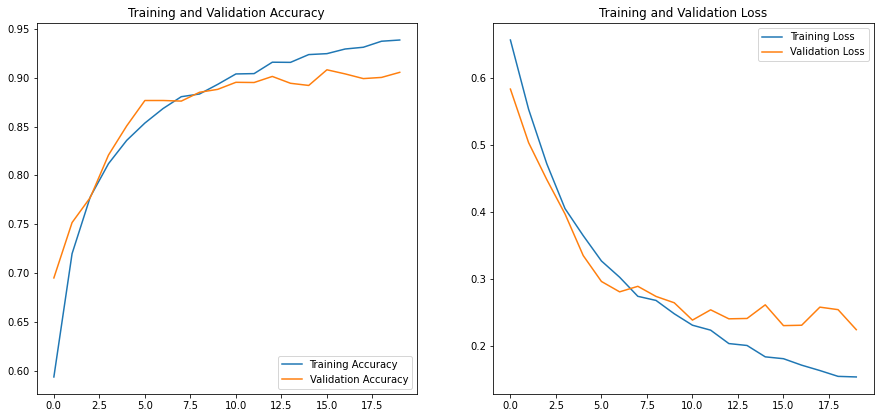

In [16]:
#Daten des Trainings abrufen
accuracy = cnn_model.history['accuracy']
val_accuracy = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs_range = range(len(accuracy))

#Erstellen der Grafik für Trainings- und Validations Accuracy
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Erstellen der Grafik für Training und Validation Loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

(0.5, 1.0)

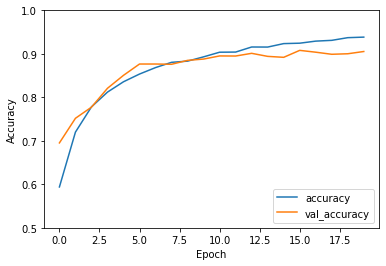

In [17]:
#Erstellen der Grafik für???
plt.plot(cnn_model.history['accuracy'], label='accuracy')
plt.plot(cnn_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
#Von jedem Layer den Output anzeigen
from keract import get_activations, display_activations
keract_inputs = X_val[:1]
keract_targets = y_val[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, save=True)

conv2d_input (1, 100, 100, 3) 
conv2d (1, 98, 98, 32) 
max_pooling2d (1, 49, 49, 32) 
dropout (1, 49, 49, 32) 
conv2d_1 (1, 47, 47, 64) 
max_pooling2d_1 (1, 23, 23, 64) 
dropout_1 (1, 23, 23, 64) 
conv2d_2 (1, 21, 21, 128) 
max_pooling2d_2 (1, 10, 10, 128) 
dropout_2 (1, 10, 10, 128) 
conv2d_3 (1, 8, 8, 256) 
max_pooling2d_3 (1, 4, 4, 256) 
dropout_3 (1, 4, 4, 256) 
conv2d_4 (1, 2, 2, 512) 
max_pooling2d_4 (1, 1, 1, 512) 
dropout_4 (1, 1, 1, 512) 
flatten (1, 512) 
dense (1, 512) 
dense_1 (1, 1) 
